In [9]:
!pip install shap


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
##importing libraries##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from imblearn.over_sampling import ADASYN
from collections import Counter
import seaborn as sns
import shap

In [11]:
###Data Fetching###
lymph_file="C:\Code With Harry Python\Lymphography Data Classification Using Explainable AI\lymph_dataset.mat"
lymph_data=sio.loadmat(lymph_file)
print(lymph_data)
X_raw=lymph_data['norm_data']
y_raw=lymph_data['target']
print(X_raw.shape)
print(y_raw.shape)
Y=np.ravel(y_raw)



{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Dec 20 20:40:28 2024', '__version__': '1.0', '__globals__': [], 'inpdata': array([[3, 4, 2, ..., 1, 2, 2],
       [2, 3, 2, ..., 2, 2, 2],
       [3, 3, 2, ..., 2, 2, 7],
       ...,
       [3, 2, 2, ..., 2, 2, 4],
       [2, 2, 1, ..., 2, 2, 1],
       [2, 2, 2, ..., 2, 2, 6]], shape=(148, 19), dtype=uint8), 'norm_data': array([[4, 2, 1, ..., 1, 2, 2],
       [3, 2, 1, ..., 2, 2, 2],
       [3, 2, 2, ..., 2, 2, 7],
       ...,
       [2, 2, 1, ..., 2, 2, 4],
       [2, 1, 1, ..., 2, 2, 1],
       [2, 2, 2, ..., 2, 2, 6]], shape=(148, 18), dtype=uint8), 'target': array([[3],
       [2],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [2],
       [2],
       [2],
       [3],
       [4],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3

In [12]:
###balancing the dataset###
counter=Counter(Y)
print("before",counter)

ada=ADASYN(n_neighbors=1)
X_resamp,Y_resamp=ada.fit_resample(X_raw,Y)

new_counter=Counter(Y_resamp)
print("after",new_counter)


before Counter({np.uint8(2): 81, np.uint8(3): 61, np.uint8(4): 4, np.uint8(1): 2})
after Counter({np.uint8(4): 82, np.uint8(2): 81, np.uint8(1): 81, np.uint8(3): 78})


In [13]:
##data normalizing##
scaler=MinMaxScaler()
X=scaler.fit_transform(X_resamp)
print(X)


[[0.01388889 0.00784314 0.00392157 ... 0.00392157 0.00411523 0.00395257]
 [0.00925926 0.00784314 0.00392157 ... 0.00784314 0.00411523 0.00395257]
 [0.00925926 0.00784314 0.00784314 ... 0.00784314 0.00411523 0.02371542]
 ...
 [0.00925926 0.85490196 0.85490196 ... 0.85490196 0.89300412 0.02371542]
 [0.00925926 0.48627451 0.48627451 ... 0.48627451 0.50617284 0.02371542]
 [0.00925926 0.31764706 0.31764706 ... 0.31764706 0.32921811 0.02371542]]


In [14]:
###Test_Train_Split###
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_resamp,test_size=0.2,random_state=10)
results=[]
train_arr=[]

In [15]:
###Model Calling###
for k in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=k)
    ##training the model.####
    clf.fit(X_train,Y_train)
    train_accuracy=clf.score(X_train,Y_train)
    train_arr.append(train_accuracy)
###Cross_validation accuracy over k neighbours.###
    score=cross_val_score(clf,X_test,Y_test,cv=4)
    results.append(np.mean(score))
print(results)
###training accuracy####
train_accuracy_best=max(train_arr)
train_accuracy_worst=min(train_arr)
print(f"best training accuracy:{train_accuracy_best*100:.2f}%")
print(f"worst training accuracy:{train_accuracy_worst*100:.2f}%")
print(f"mean_traing accuracy:{np.mean(train_arr)*100:.2f}")



[np.float64(0.8612132352941176), np.float64(0.7674632352941176), np.float64(0.8759191176470589), np.float64(0.8152573529411764), np.float64(0.8299632352941176), np.float64(0.8612132352941176), np.float64(0.8455882352941176), np.float64(0.8143382352941176), np.float64(0.7987132352941176)]
best training accuracy:100.00%
worst training accuracy:85.99%
mean_traing accuracy:90.06


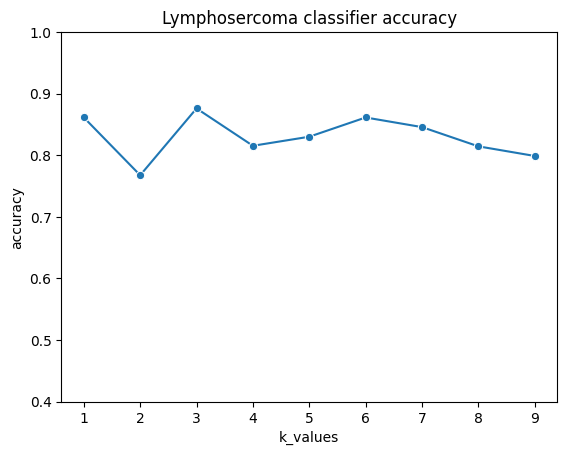

In [16]:
###model Graph##
k_list=range(1,10)
sns.lineplot(x=k_list,y=results,marker='o')
plt.ylim(0.4,1.0)
plt.xlabel("k_values")
plt.ylabel("accuracy")
plt.title("Lymphosercoma classifier accuracy")
plt.show()

In [17]:
####model prediction.###
test_pred=clf.predict(X_test)
##classification report.####
accuracy=accuracy_score(Y_test,test_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(Y_test,test_pred))
mean= np.mean(results)
Cross_best=max(results)
print(f"Cross_validation best_accuracy:{Cross_best*100:.2f}")
print(f"Cross_validation avarage_accuracy:{mean*100:.2f}")
st_dv=np.std(results)
print(f"Cross _validation standard_deviation:{st_dv*10:.2f}")

Accuracy: 92.31%

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.87      0.87      0.87        15
           3       0.86      0.86      0.86        14
           4       0.95      1.00      0.97        19

    accuracy                           0.92        65
   macro avg       0.92      0.92      0.92        65
weighted avg       0.92      0.92      0.92        65

Cross_validation best_accuracy:87.59
Cross_validation avarage_accuracy:83.00
Cross _validation standard_deviation:0.33


100%|██████████| 9/9 [00:01<00:00,  4.66it/s]


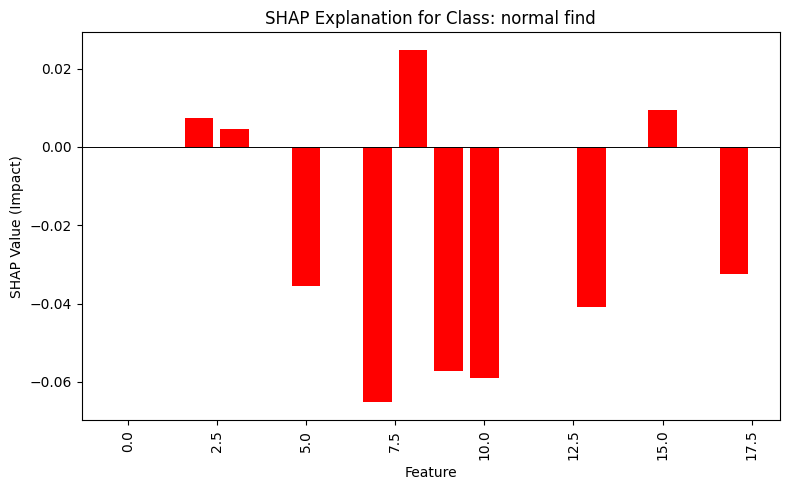

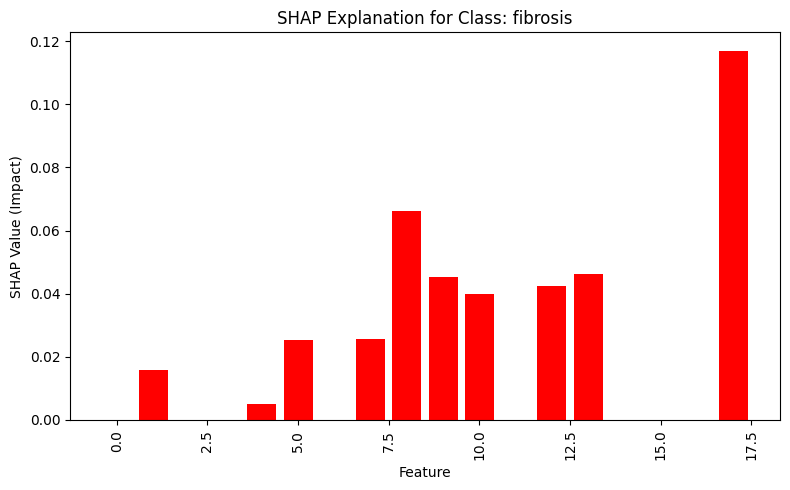

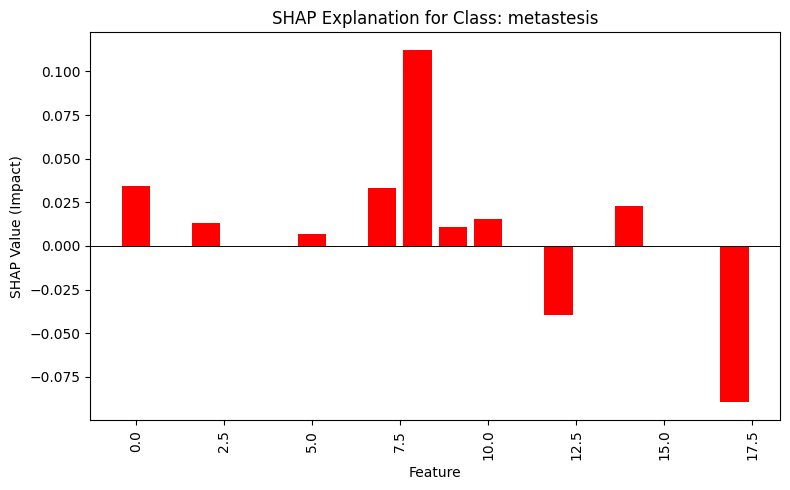

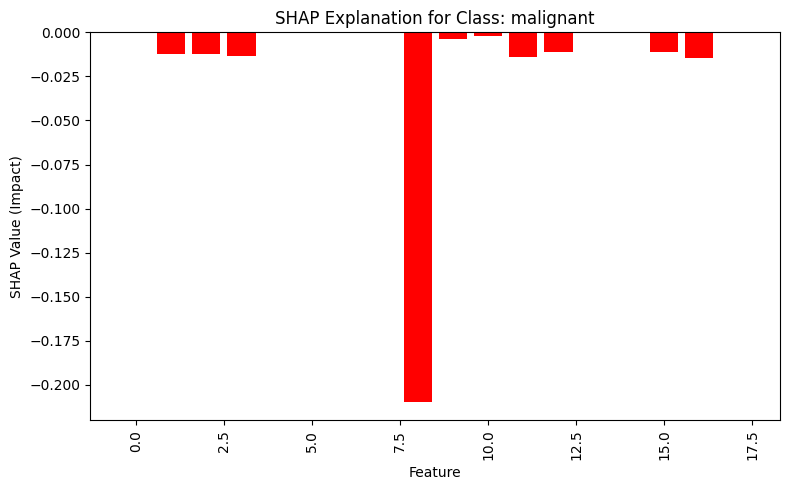

In [18]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 0 — Convert X_test to DataFrame (same as your LIME code)
df_X = pd.DataFrame(X_test)

# Step 1 — Create SHAP KernelExplainer for KNN model
explainer = shap.KernelExplainer(clf.predict_proba, shap.sample(df_X, 100))
# Sample 100 rows as background (adjust if needed)

# Step 2 — Choose an instance to explain (same as LIME)
instance = df_X.iloc[7:16]  # Keep it as DataFrame slice

# Step 3 — Compute SHAP values for the instance (all classes)
shap_values = explainer.shap_values(instance)

# Step 4 — Your class names (same as LIME)
class_names = ['normal find', 'fibrosis', 'metastesis', 'malignant']

# Step 5 — Display explanations (one bar plot per class)
# The shap_values array seems to have an unexpected shape.
# Assuming it's (1, num_features, num_classes), we need to adjust the indexing:
for class_idx, class_label in enumerate(class_names):
    # Accessing SHAP values for the instance, all features, and the current class
    shap_vals_for_class = shap_values[0][:, class_idx]

    feature_names = df_X.columns
    weights = shap_vals_for_class

    # Sort features by absolute SHAP value (optional for clearer plot)
    sorted_idx = np.argsort(np.abs(weights))[::-1]
    feature_names_sorted = feature_names[sorted_idx]
    weights_sorted = weights[sorted_idx]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(feature_names_sorted, weights_sorted, color='red')
    plt.xlabel('Feature')
    plt.ylabel('SHAP Value (Impact)')
    plt.title(f'SHAP Explanation for Class: {class_label}')
    plt.xticks(rotation=90)
    plt.axhline(0, color='black', linewidth=0.7)
    plt.tight_layout()
    plt.show()